In [1]:
# Даалгавар 1
import cv2

img = cv2.imread('chap2/Fig0221(a)(ctskull-256).tif')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.resize(img, [150, 150])
images = []

for bits in range(1, 8, +1):
    max_val = 2 ** bits - 1
    img_bits = (img//max_val)*max_val
    images.append(img_bits)

bit1 = cv2.bitwise_and(img, 0x80)
images.append(bit1)

cat = cv2.hconcat(images)

cv2.imshow("All Images", cat)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [2]:
# Даалгавар 2
import cv2
img = cv2.imread('chap2/Fig0219(rose1024).tif')

images = []

img128 = cv2.resize(img, (128, 128), interpolation=cv2.INTER_NEAREST)
img64 = cv2.resize(img, (64, 64), interpolation=cv2.INTER_NEAREST)
img32 = cv2.resize(img, (32, 32), interpolation=cv2.INTER_NEAREST)


near_img = cv2.resize(img128, (200, 200), interpolation=cv2.INTER_NEAREST)
images.append(near_img)
near_img = cv2.resize(img64, (200, 200), interpolation=cv2.INTER_NEAREST)
images.append(near_img)
near_img = cv2.resize(img32, (200, 200), interpolation=cv2.INTER_NEAREST)
images.append(near_img)

    
img128 = cv2.resize(img, (128, 128), interpolation=cv2.INTER_LINEAR)
img64 = cv2.resize(img, (64, 64), interpolation=cv2.INTER_LINEAR)
img32 = cv2.resize(img, (32, 32), interpolation=cv2.INTER_LINEAR)

linear_img = cv2.resize(img128, (200, 200), interpolation=cv2.INTER_LINEAR)
images.append(linear_img)
linear_img = cv2.resize(img64, (200, 200), interpolation=cv2.INTER_LINEAR)
images.append(linear_img)
linear_img = cv2.resize(img32, (200, 200), interpolation=cv2.INTER_LINEAR)
images.append(linear_img)

cat = cv2.hconcat(images)

cv2.imshow('Resized Image', cat)
cv2.waitKey(0)
cv2.destroyAllWindows()




In [4]:
# Даалгавар 3
import cv2

img = cv2.imread('chap3/Fig0320(2)(2nd_from_top).tif')
images = []

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

min_val, max_val, _, _ = cv2.minMaxLoc(gray)

scale = (255 - 0) / (max_val - min_val)
shift = 0 - (scale * min_val)

stretched = cv2.convertScaleAbs(gray, alpha=scale, beta=shift)

bit1 = cv2.bitwise_and(stretched, 0x80)

images.append(gray)
images.append(stretched)
images.append(bit1)

cat = cv2.hconcat(images)

cv2.imshow("All Images", cat)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
# Даалгавар 4
import cv2

img = cv2.imread('chap3/Fig0312(a)(kidney).tif')
images = []

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
bit2 = cv2.bitwise_and(gray, 0xC0)

gray = cv2.resize(gray, [400, 400])
bit1 = cv2.resize(gray, [400, 400])
bit2 = cv2.resize(gray, [400, 400])

for i in range(bit1.shape[0]):
    for j in range(bit1.shape[1]):
        if (bit1[i][j] < 150 and bit1[i][j] > 70):
            bit1[i][j] = 37
        else:
            bit1[i][j] = 230

for i in range(bit2.shape[0]):
    for j in range(bit2.shape[1]):
        if (bit2[i][j] < 150 and bit2[i][j] > 70):
            bit2[i][j] = 70
        else:
            bit2[i][j] = 180


images.append(gray)
images.append(bit1)
images.append(bit2)

cat = cv2.hconcat(images)

cv2.imshow("All Images", cat)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
# Даалгавар 5

import cv2
import numpy as np

img = cv2.imread('chap3/Fig0314(a)(100-dollars).tif')
img = cv2.resize(img, (380, 250))
images = []

for i in range(8):
    j = np.bitwise_and(img, 1 << i)
    j = np.uint8(j * 255)
    images.append(j)

row1 = images[:4]
row2 = images[4:]

row1_cat = cv2.hconcat(row1)
row2_cat = cv2.hconcat(row2)

final_image = cv2.vconcat([row1_cat, row2_cat])

cv2.imshow("All Images", final_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Text(0.5, 1.0, 'Histogram of Equalized 4')

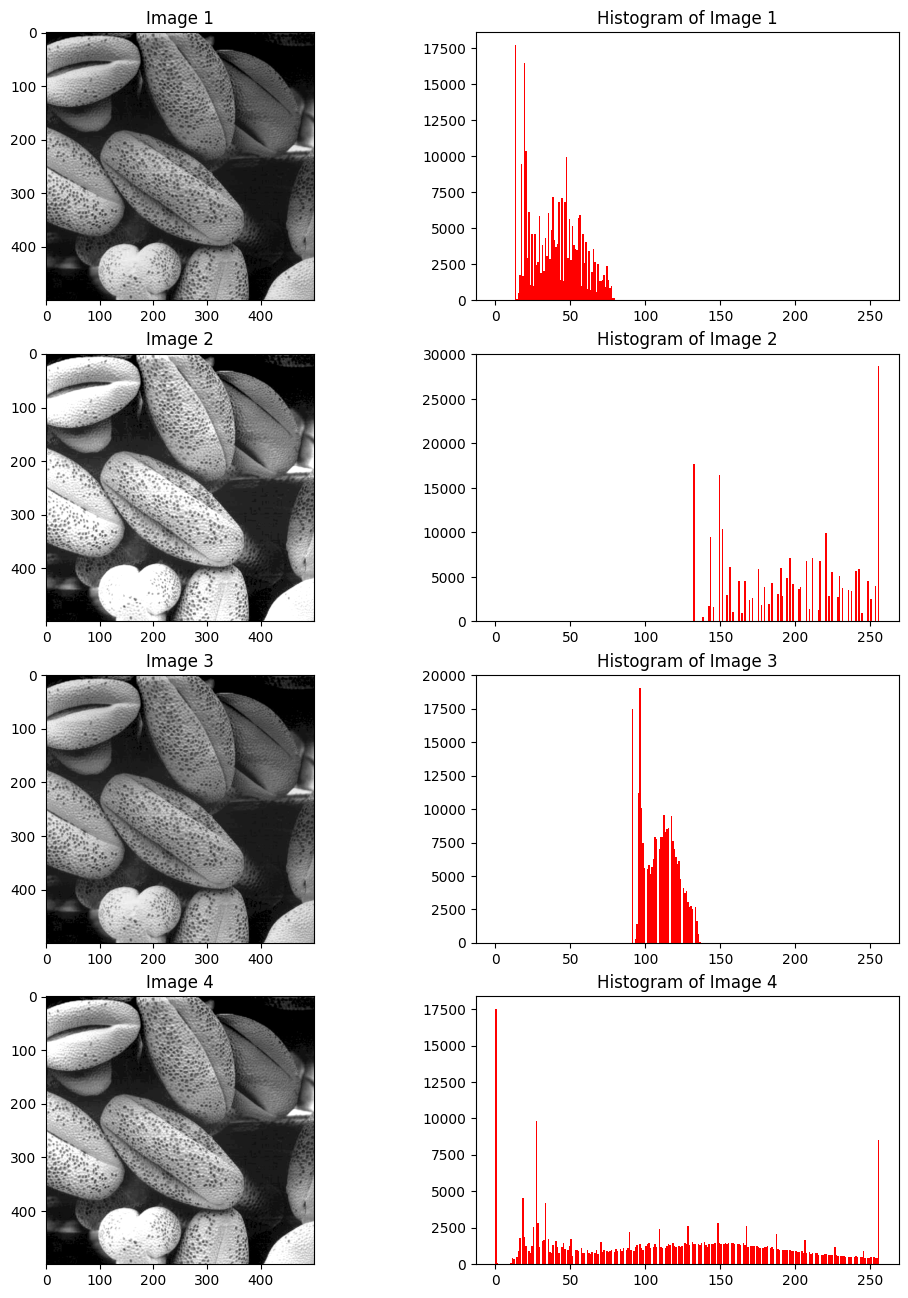

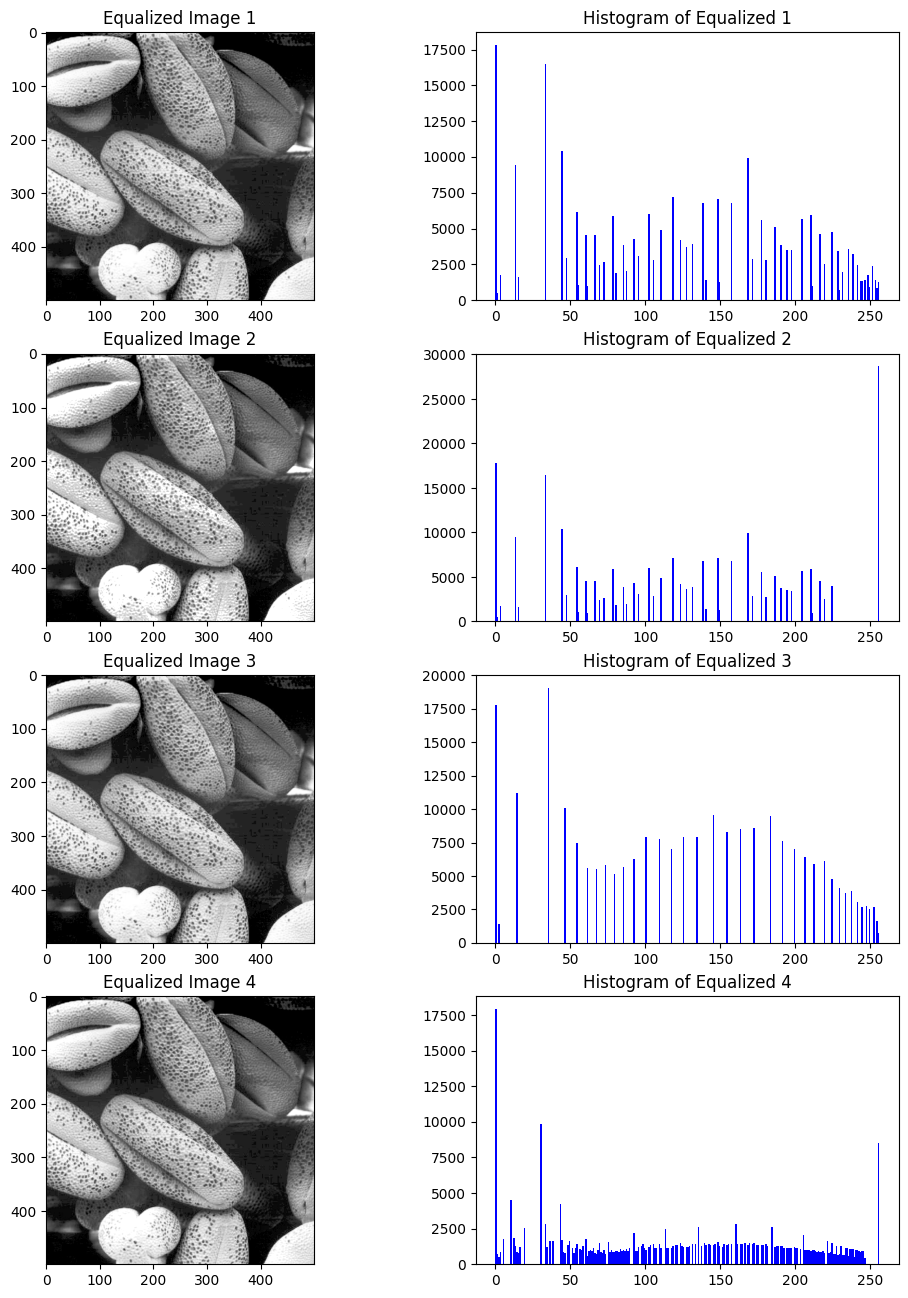

In [1]:
# Даалгавар 6

import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('chap3/Fig0320(4)(bottom_left).tif', 0)
img2 = cv2.imread('chap3/Fig0320(1)(top_left).tif', 0)
img3 = cv2.imread('chap3/Fig0320(2)(2nd_from_top).tif', 0)
img4 = cv2.imread('chap3/Fig0320(3)(third_from_top).tif', 0)

equalized_img1 = cv2.equalizeHist(img1)
equalized_img2 = cv2.equalizeHist(img2)
equalized_img3 = cv2.equalizeHist(img3)
equalized_img4 = cv2.equalizeHist(img4)

fig, axs = plt.subplots(4, 2, figsize=(12, 16))

axs[0, 0].imshow(img1, cmap='gray')
axs[0, 0].set_title('Image 1')
axs[1, 0].imshow(img2, cmap='gray')
axs[1, 0].set_title('Image 2')
axs[2, 0].imshow(img3, cmap='gray')
axs[2, 0].set_title('Image 3')
axs[3, 0].imshow(img4, cmap='gray')
axs[3, 0].set_title('Image 4')

axs[0, 1].hist(img1.ravel(), 256, [0, 256], color='r')
axs[0, 1].set_title('Histogram of Image 1')
axs[1, 1].hist(img2.ravel(), 256, [0, 256], color='r')
axs[1, 1].set_title('Histogram of Image 2')
axs[2, 1].hist(img3.ravel(), 256, [0, 256], color='r')
axs[2, 1].set_title('Histogram of Image 3')
axs[3, 1].hist(img4.ravel(), 256, [0, 256], color='r')
axs[3, 1].set_title('Histogram of Image 4')

fig2, axs2 = plt.subplots(4, 2, figsize=(12, 16))

axs2[0, 0].imshow(equalized_img1, cmap='gray')
axs2[0, 0].set_title('Equalized Image 1')
axs2[1, 0].imshow(equalized_img2, cmap='gray')
axs2[1, 0].set_title('Equalized Image 2')
axs2[2, 0].imshow(equalized_img3, cmap='gray')
axs2[2, 0].set_title('Equalized Image 3')
axs2[3, 0].imshow(equalized_img4, cmap='gray')
axs2[3, 0].set_title('Equalized Image 4')

axs2[0, 1].hist(equalized_img1.ravel(), 256, [0, 256], color = 'b')
axs2[0, 1].set_title('Histogram of Equalized 1')
axs2[1, 1].hist(equalized_img2.ravel(), 256, [0, 256], color = 'b')
axs2[1, 1].set_title('Histogram of Equalized 2')
axs2[2, 1].hist(equalized_img3.ravel(), 256, [0, 256], color = 'b')
axs2[2, 1].set_title('Histogram of Equalized 3')
axs2[3, 1].hist(equalized_img4.ravel(), 256, [0, 256], color = 'b')
axs2[3, 1].set_title('Histogram of Equalized 4')


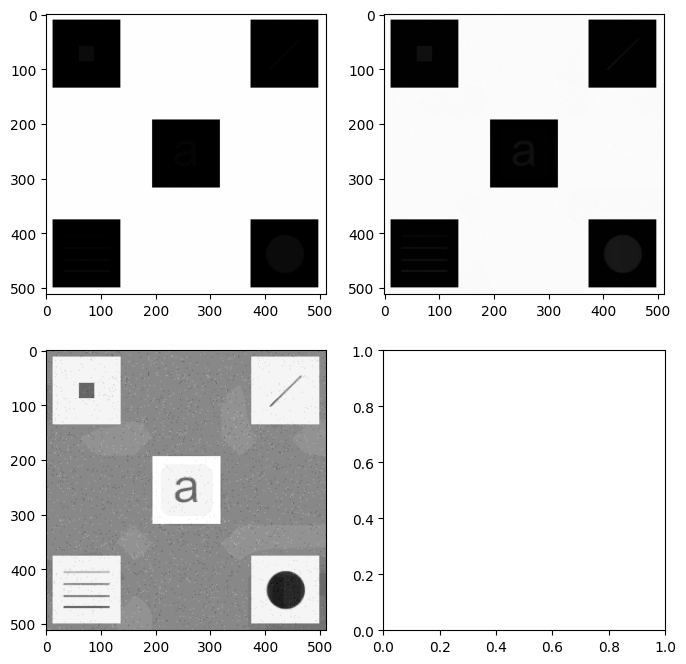

In [42]:
# Даалгавар 7
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('chap3/Fig0326(a)(embedded_square_noisy_512).tif', 0)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced = clahe.apply(img)
equalization = np.uint8(enhanced * 250)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0, 0].imshow(img, cmap='gray')
axs[0, 1].imshow(enhanced, cmap='gray')
axs[1, 0].imshow(equalization, cmap='gray')

In [3]:
# Даалгавар 8
import cv2
import numpy as np

img = cv2.imread('chap4/castle.png', 0)

and_mask = np.zeros_like(img)
and_mask[10:150, 80:160] = 1

or_mask = np.full_like(img, 255)
or_mask[10:150, 80:160] = 0

and_result = cv2.bitwise_and(img, img, mask=and_mask)
or_result = cv2.add(img, or_mask)

cv2.imshow('Orignal', img)
cv2.imshow('AND result', and_result)
cv2.imshow('OR result', or_result)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# Даалгавар 9
# Бэлэн Функц
import cv2
import numpy as np

img = cv2.imread('chap3/Fig0333(a)(test_pattern_blurring_orig).tif')

# маск хэмжээ
mask_sizes = [3, 5, 9, 15, 35]

for size in mask_sizes:
    #Маскийг тодорхойлох
    mask = np.ones((size, size), np.float32) / (size * size)
    # Шүүлтүүрийг хэрэглэнэ
    filtered_img = cv2.filter2D(img, -1, mask)
    cv2.imshow('Filtered image (mask size = {})'.format(size), filtered_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Давталт
# for size in mask_sizes:
#     mask = np.ones((size, size), np.float32) / (size * size)
#     mask_half = size // 2
#     filtered_img = np.zeros_like(img)

#     for i in range(mask_half, img.shape[0] - mask_half):
#         for j in range(mask_half, img.shape[1] - mask_half):
#             filtered_img[i, j] = (img[i-mask_half:i+mask_half+1, j-mask_half:j+mask_half+1] * mask).sum(axis=(0, 1))

#     cv2.imshow('Filtered image (mask size = {})'.format(size), filtered_img.astype(np.uint8))
#     cv2.waitKey(0)

# cv2.destroyAllWindows()


In [27]:
# Даалгавар 10
import cv2

img = cv2.imread('chap3/Fig0334(a)(hubble-original).tif')

# Гауссын blur
gaussian_blur = cv2.GaussianBlur(img, (15, 15), 0)

# Thresholding
gray = cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2GRAY)
ret, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

cv2.imshow('Original image', img)
cv2.imshow('Filtered image', gaussian_blur)
cv2.imshow('Thresholded image', threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [30]:
# Даалгавар 11
import cv2

image = cv2.imread('chap3/Fig0335(a)(ckt_board_saltpep_prob_pt05).tif', cv2.IMREAD_GRAYSCALE)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
image_noise_reduction_mask = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

image_noise_reduction_median = cv2.medianBlur(image, 3)

cv2.imshow('Original Image', image)
cv2.imshow('Noise Reduction with 3x3 Mask', image_noise_reduction_mask)
cv2.imshow('Noise Reduction with 3x3 Median Filter', image_noise_reduction_median)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [32]:
# Даалгавар 12
import cv2
import numpy as np

image = cv2.imread("chap3/Fig0338(a)(blurry_moon).tif", cv2.IMREAD_GRAYSCALE)

laplacian_no_scaling = cv2.Laplacian(image, cv2.CV_64F, ksize=3)

laplacian_with_scaling = cv2.Laplacian(image, cv2.CV_64F, ksize=3)
laplacian_with_scaling = cv2.convertScaleAbs(laplacian_with_scaling)

sharpen_mask1 = np.array([[0, 1, 0],
                          [1, -4, 1],
                          [0, 1, 0]])

sharpen_mask2 = np.array([[1, 1, 1],
                          [1, -8, 1],
                          [1, 1, 1]])

image_sharpened1 = cv2.filter2D(image, -1, sharpen_mask1)
image_sharpened2 = cv2.filter2D(image, -1, sharpen_mask2)

cv2.imshow("Original Image", image)
cv2.imshow("Laplacian without Scaling", laplacian_no_scaling)
cv2.imshow("Laplacian with Scaling", laplacian_with_scaling)
cv2.imshow("Image Sharpened using Mask 1", image_sharpened1)
cv2.imshow("Image Sharpened using Mask 2", image_sharpened2)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [33]:
# Даалгавар 13
import cv2
import numpy as np

image = cv2.imread("chap3/Fig0340(a)(dipxe_text).tif", cv2.IMREAD_GRAYSCALE)

ksize = (5, 5)
sigma = 0
blur = cv2.GaussianBlur(image, ksize, sigma)

unsharp = image-blur
unsharp_mask = unsharp + image

high_boost = unsharp*10+image


cv2.imshow("Original Image", image)
cv2.imshow("Gaussian Blur", blur)
cv2.imshow("MASK", unsharp)
cv2.imshow("Unsharp Mask", unsharp_mask)
cv2.imshow("High Boost Filtering", high_boost)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [34]:
# Даалгавар 14
import cv2
import numpy as np

image = cv2.imread('chap3/Fig0343(a)(skeleton_orig).tif', cv2.IMREAD_GRAYSCALE)

laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

sharpened = cv2.add(image, laplacian)

sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_gradient = cv2.add(np.absolute(sobelx), np.absolute(sobely))
sobel_gradient = np.uint8(sobel_gradient)

sobel_smoothed = cv2.blur(sobel_gradient, (5, 5))

mask = cv2.multiply(sharpened, sobel_smoothed, scale=1 / 255.0)
sharpened_image = cv2.add(image, mask)

gamma = 0.5
result = np.power(sharpened_image / 255.0, gamma)
result = np.uint8(result * 255)

cv2.imshow('Original Image', image)
cv2.imshow('Laplacian', laplacian)
cv2.imshow('Sharpened Image 1', sharpened.astype(np.uint8))
cv2.imshow('Sobel Gradient', sobel_gradient)
cv2.imshow('Sobel Smoothed', sobel_smoothed)
cv2.imshow('Sharpened Image 2', sobel_smoothed)
cv2.imshow('Mask', mask)
cv2.imshow('Final Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()


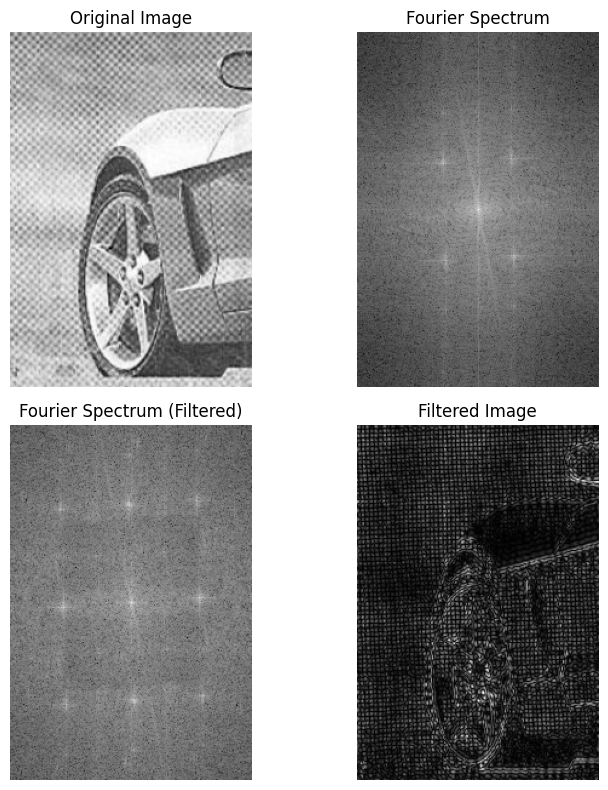

In [29]:
# Даалгавар 15
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('chap4/car.png', cv2.IMREAD_GRAYSCALE)

# Зургийн fourier хувирал
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))  

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# Radius of the notch filter
radius = 30

mask = np.ones((rows, cols), dtype=np.uint8)
mask[crow - radius:crow + radius, ccol - radius:ccol + radius] = 0

# Fourier хувиргалтанд mask apply 
fshift_filtered = fshift * mask

f_filtered = np.fft.ifftshift(fshift_filtered)

filtered_image = np.abs(np.fft.ifft2(f_filtered)).astype(np.uint8)

filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)

filtered_fshift = np.fft.fftshift(np.fft.fft2(filtered_image))
filtered_magnitude_spectrum = 20 * np.log(np.abs(filtered_fshift)) 

plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Spectrum')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(filtered_magnitude_spectrum, cmap='gray')
plt.title('Fourier Spectrum (Filtered)')
plt.axis('off')

plt.tight_layout()
plt.show()
